# Introduction to the workflow structure

This notebook gives a brief overview of the workflow structure and introduces some useful DataJoint tools to facilitate the exploration.

+ DataJoint needs to be pre-configured before running this notebook, if you haven't set up the configuration, refer to notebook [01-configure](01-configure.ipynb).

+ If you are familar with DataJoint and the workflow structure, proceed to the next notebook [03-process](03-process.ipynb) directly to run the workflow.

+ For a more thorough introduction of DataJoint functionings, please visit our [general tutorial site](https://playground.datajoint.io)

To load the local configuration, we will change the directory to the package root.

In [1]:
import os
os.chdir('..')

## Schemas and tables

+ The current workflow is composed of multiple database schemas, each of them corresponds to a module within `workflow_calcium_imaging.pipeline`

In [2]:
import datajoint as dj
from workflow_calcium_imaging.pipeline import lab, subject, session, scan, imaging

Connecting user1@127.0.0.1:3306


+ Each module contains a schema object that enables interaction with the schema in the database.

In [3]:
imaging.schema

Schema `neuro_imaging`

+ The table classes in the module corresponds to a table in the schema in the database.

In [4]:
# preview columns and contents in a table
imaging.Processing()

subject,session_datetime,scan_id,paramset_idx,"processing_time time of generation of this set of processed, segmented results",package_version


+ By importing the modules for the first time, the schemas and tables will be created inside the database.

+ Once created, importing modules will not create schemas and tables again, but the existing schemas/tables can be accessed and manipulated by the modules.

## DataJoint tools to explore schemas and tables

+ `dj.list_schemas()`: list all schemas a user has access to in the current database

In [19]:
dj.list_schemas()

+ `dj.Diagram()`: plot tables and dependencies in a schema. 

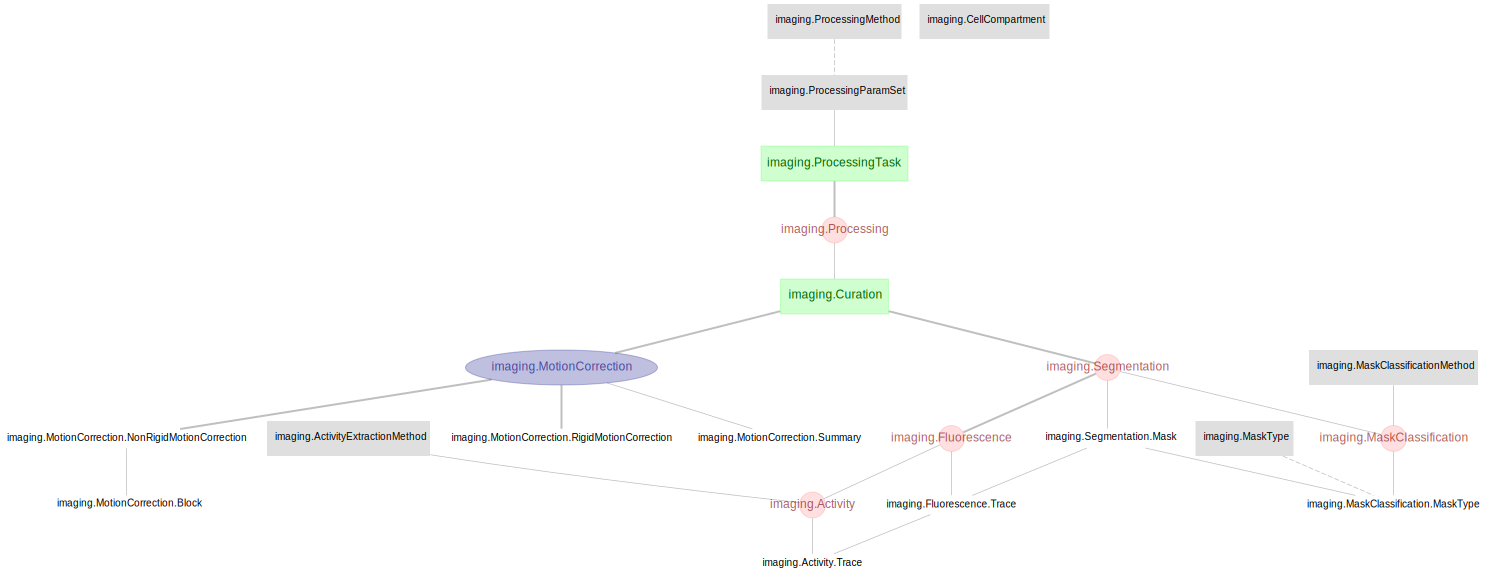

In [6]:
# plot diagram for all tables in a schema
dj.Diagram(imaging)

**Table tiers**: 

Manual table: green box, manually inserted table, expect new entries daily, e.g. Subject, ProbeInsertion.  
Lookup table: gray box, pre inserted table, commonly used for general facts or parameters. e.g. Strain, ClusteringMethod, ClusteringParamSet.  
Imported table: blue oval, auto-processing table, the processing depends on the importing of external files. e.g. process of Clustering requires output files from kilosort2.  
Computed table: red circle, auto-processing table, the processing does not depend on files external to the database, commonly used for     
Part table: plain text, as an appendix to the master table, all the part entries of a given master entry represent a intact set of the master entry. e.g. Unit of a CuratedClustering.

**Dependencies**:  

One-to-one primary: thick solid line, share the exact same primary key, meaning the child table inherits all the primary key fields from the parent table as its own primary key.     
One-to-many primary: thin solid line, inherit the primary key from the parent table, but have additional field(s) as part of the primary key as well
secondary dependency: dashed line, the child table inherits the primary key fields from parent table as its own secondary attribute.

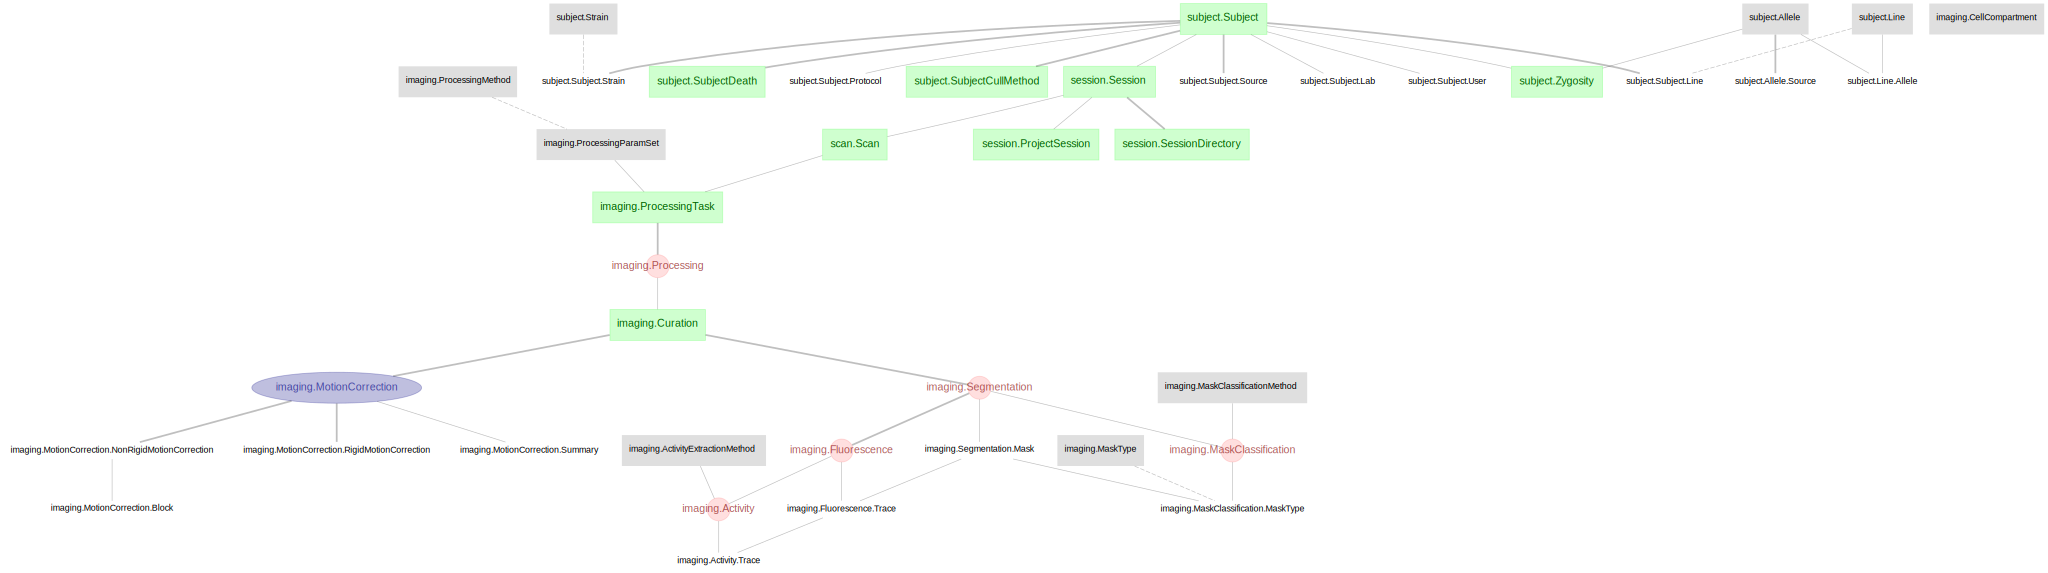

In [7]:
# plot diagram of tables in multiple schemas
dj.Diagram(subject) + dj.Diagram(session) + dj.Diagram(imaging)

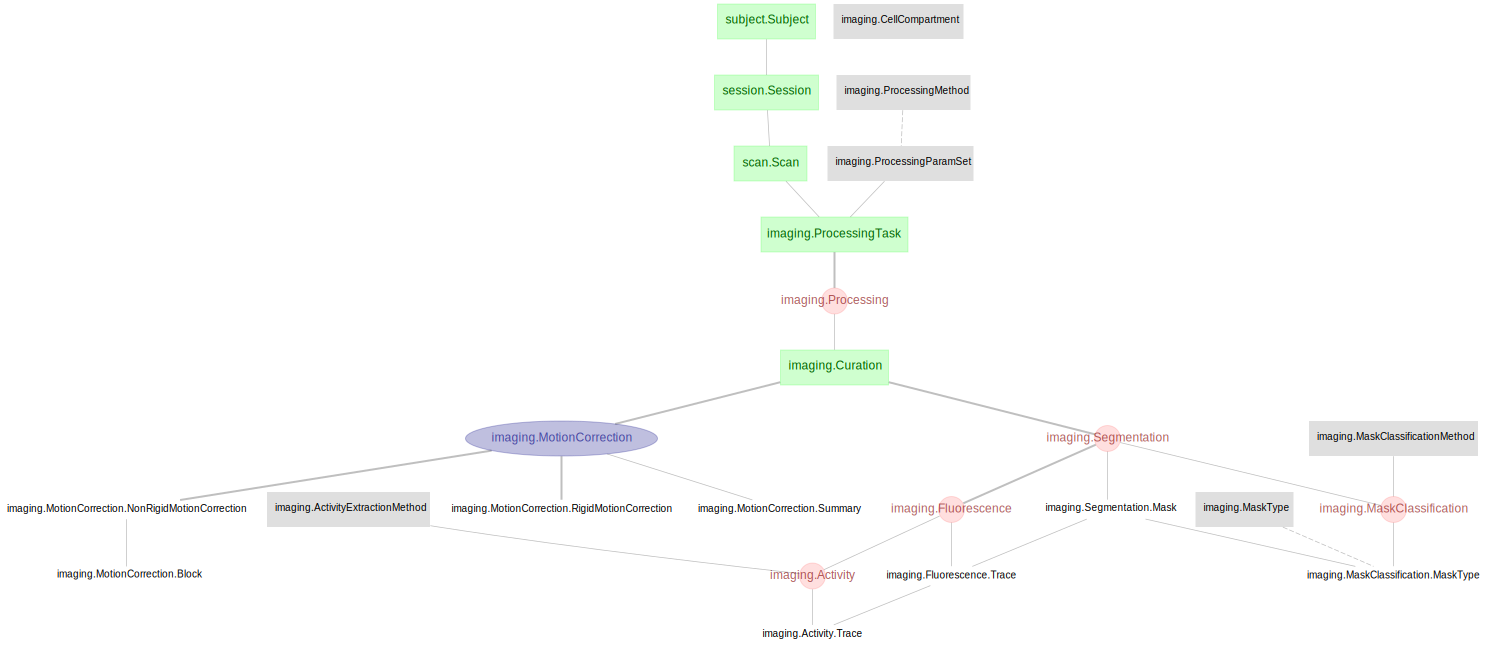

In [8]:
# plot diagram of selected tables and schemas
dj.Diagram(subject.Subject) + dj.Diagram(session.Session) + dj.Diagram(imaging)

+ `describe()`: show table definition with foreign key references.

In [9]:
imaging.Processing.describe();

# Processing Procedure
-> imaging.ProcessingTask
---
processing_time      : datetime                     # time of generation of this set of processed, segmented results
package_version=""   : varchar(16)                  



+ `heading`: show attribute definitions regardless of foreign key references

In [10]:
imaging.Processing.heading

# Processing Procedure
subject              : varchar(32)                  # 
session_datetime     : datetime(3)                  # 
scan_id              : int                          # 
paramset_idx         : smallint                     # 
---
processing_time      : datetime                     # time of generation of this set of processed, segmented results
package_version=""   : varchar(16)                  # 

# DataJoint Elements installed in the `workflow-calcium-imaging`

+ [`lab`](https://github.com/datajoint/element-lab): lab management related information, such as Lab, User, Project, Protocol, Source.

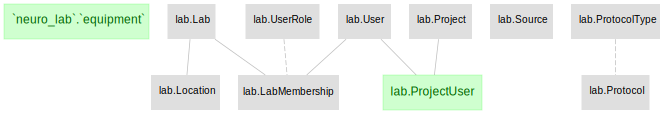

In [11]:
dj.Diagram(lab)

+ [`subject`](https://github.com/datajoint/element-animal): general animal information, User, Genetic background, Death etc.

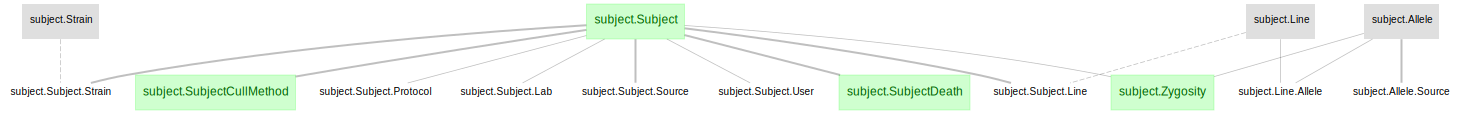

In [12]:
dj.Diagram(subject)

In [13]:
subject.Subject.describe();

# Animal Subject
subject              : varchar(32)                  
---
sex                  : enum('M','F','U')            
subject_birth_date   : date                         
subject_description="" : varchar(1024)                



+ [`session`](https://github.com/datajoint/element-session): General information of experimental sessions.

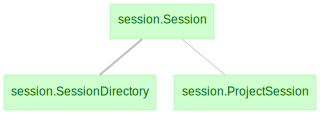

In [14]:
dj.Diagram(session)

In [15]:
session.Session.describe();

-> subject.Subject
session_datetime     : datetime(3)                  



+ [`imaging`](https://github.com/datajoint/element-calcium-imaging): Calcium imaging raw scan and processed data

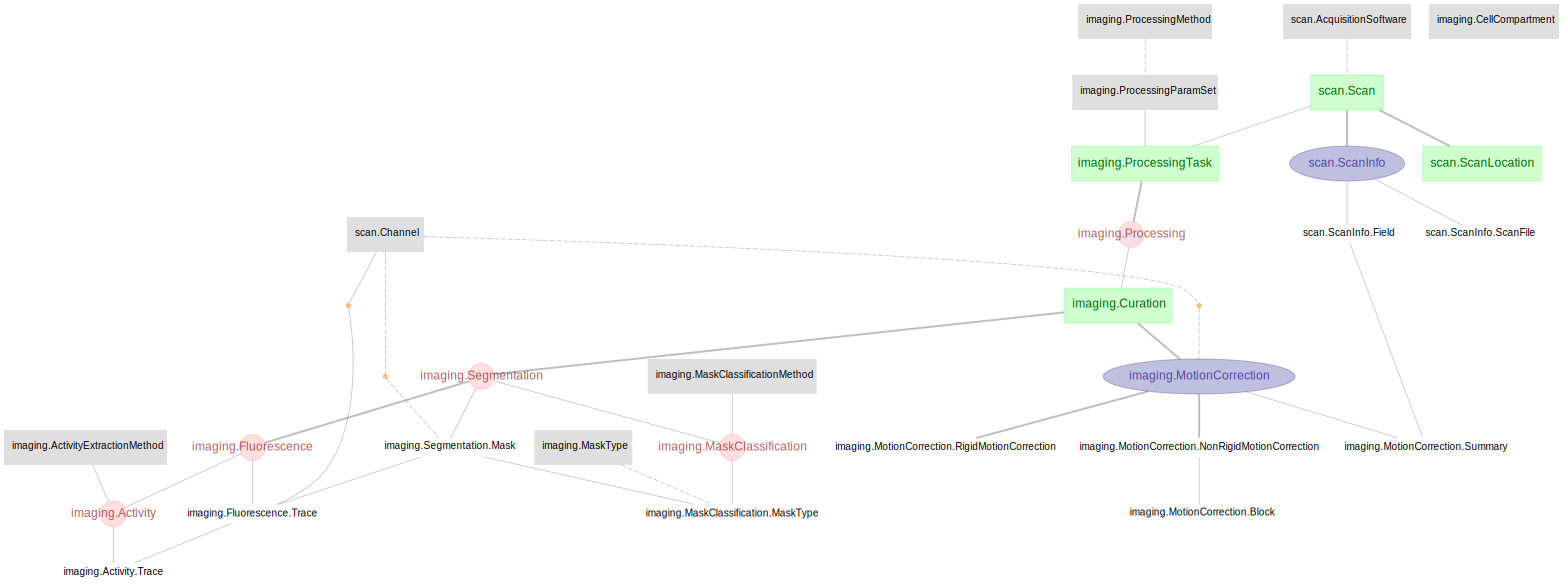

In [16]:
dj.Diagram(scan) + dj.Diagram(imaging)

## Summary and next step

+ This notebook introduced the overall structures of the schemas and tables in the workflow and relevant tools to explore the schema structure and table definitions.

+ In the next notebook [03-process](03-process.ipynb), we will introduce the detailed steps to run through `workflow-calcium-imaging`.